In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to hide warnings
import warnings 
warnings.filterwarnings('ignore')

# Logistic Regression

## Introduction

**Classification problems** are those in which we want to determine which **category or class** within a **discrete set of classes** a given observation belongs to, based on its features.

For this, we build a **classifier**: a model that has as input the features (continuous or discrete) and as output one of the classes (discrete).

> Main difference between regression and classification problems:
> - Regression: continuous output;
> - Classification: discrete values (binary or not).

<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Classification problems are commonly divided according to the **number of classes** to be predicted (that is, with respect to the structure of the target space):

- Binary classification: two classes (0 and 1);
- Multi-label classification: $n$ classes (0, 1, ..., $n-1$), with $n > 2 \in \mathbb{N}$

Examples of classification problems:
- Spam detection: is an e-mail SPAM or not?;
    - Features: words in the body of the e-mail; sender; subject;
- Disease detection: which medical condition does the person have?
    - Features: physiological symptoms; results of exams (measures of biological variables);
- Document type detection: secret, confidential or non-sensitive?
    - Features: words in the body of the text; title;
- Credit card fraud detection: is a transaction fraudulent or not?;
    - Features: transaction history; time, location and frequency of transactions; type of purchase;
- Credit risk model: what is the chance that a given person will not pay their loan?
    - Features: payment history; credit score;
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>

## Logistic Regression Theory

The [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (also called **logit**) is a method that we will apply to classification problems.

The objective of logistic regression is: **model the probability $P(\vec{x})$ of a given observation (with features $\vec{x}$) belonging to class 1**, that is, we want to model:

$$ P( y = 1 | \vec{x}) $$

$$0 \le P(\vec{x}) \le 1$$ 

$$ P( y = 0 | \vec{x}) = 1 - P( y = 1 | \vec{x}) $$

Once we have a function that models the probability above, we can make the classification decision as follows:

- $P(\vec{x}) \ge 0,5$: x belongs to class 1
- $P(\vec{x}) < 0.5$: x belongs to class 0

Obs.: this value of 0.5 (50%) is called "cutoff", and it can be adjusted, although it is common to fix it at 50%.

We could think of using linear regression in our classification problems, but this is not a good idea, because we would end up with negative probabilities and bad fit. In the example below, we have the probability of defaulting on a loan based on a feature (balance). Note that the model returns negative probabilities.

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
</figure> 

To solve this problem, we can adapt the linear regression function to a function that has image between 0 and 1. It would be nice if we had something like:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
</figure> 

One example of such a function is the **logistic function** or **sigmoid function**:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note that the sigmoid function has the following properties:

- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

To incorporate the idea of linear regression into logistic regression, we take:

- $z = b_0 + b_1x$, that is the linear regression model (one variable);

And substitute in the logistic function:

- $\phi(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$

With that, we take any real output of the linear model and transform it into a value between 0 and 1, as we wanted.

<img src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">

In our case, as we want to model probabilities, the function above is exactly the **hypothesis** of the logistic regression estimator, that is,

$$f_{H, \vec{b}}(x) = P(x) = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

Or, for multiple logistic regression with $p$ features $\vec{x} = x_1, \cdots, x_p$:

$$f_{H, \vec{b}}(\vec{x}) = P(\vec{x}) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}}$$

With some algebra, it is possible to show that:

$ b_0 + b_1 x_1 + \cdots + b_p x_p = \log \left ( \frac{P}{1-P} \right ) $

The quantity $\frac{P}{1-P}$ is known as **odds/chance**; and $\log \left ( \frac{P}{1-P} \right )$ is the [log-odds or logit](https://en.wikipedia.org/wiki/Logit).

Note, therefore, that we can understand logistic regression as a model in which **the logit is linear with the features**. Therefore, in fact, logistic regression is **a linear model**.

In the logistic regression, our set of hypotheses is: $\mathcal{H} = \left \{ \frac{1}{1 + e^{-(b_0 + b_1 x_1 + \cdots + b_p x_p)}} \right \}$.

The objective of the learning algorithm will be, as always, to determine which is the parameter vector $\vec{b}$ that produces a function $f_{H, \vec{b}}$ that **best fits the data**.

To illustrate this point again, let's produce some of the infinite functions of $\mathcal{H}$:

In [2]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [3]:
def hipot_lin(x, b0, b1):
    
    return b0 + b1*x

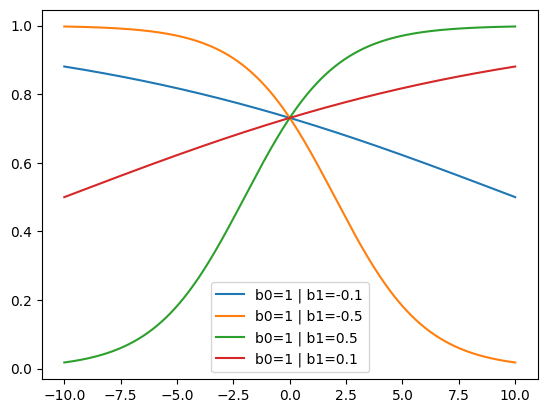

In [4]:
x = np.linspace(-10, 10, 1000)

b0 = 1
b1_list = [-0.1, -0.5, 0.5, 0.1]

for b1 in b1_list:
    y = sigmoid(hipot_lin(x, b0, b1))
    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

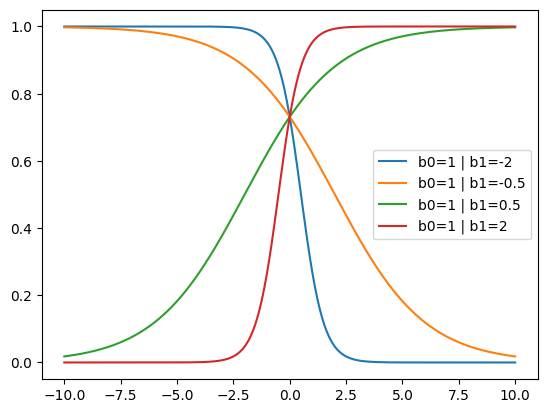

In [5]:
x = np.linspace(-10, 10, 1000)

b0 = 1
b1_list = [-2, -0.5, 0.5, 2]

for b1 in b1_list:
    y = sigmoid(hipot_lin(x, b0, b1))
    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

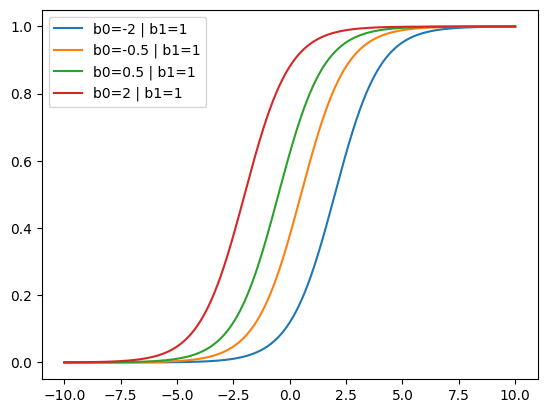

In [6]:
x = np.linspace(-10, 10, 1000)

b1 = 1
b0_list = [-2, -0.5, 0.5, 2]

for b0 in b0_list:
    y = sigmoid(hipot_lin(x, b0, b1))
    plt.plot(x, y, label=f"b0={b0} | b1={b1}")
    plt.legend()

plt.show()

## Loss function and learning algorithm

The loss function for logistic regression is the famous **binary cross-entropy** ([here](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) and [here](http://colah.github.io/posts/2015-09-Visual-Information/)), also known as [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training). This function will be of enormous importance in the study of **neural networks**.

The main implementations of the logistic regression learning algorithm are based on the [maximum likelihood method](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

For more details on the learning algorithm, see [this video](https://youtu.be/yIYKR4sgzI8) and [this video series](https://youtu.be/vN5cNN2-HWE), from the great StatQuest channel!

__________________

To introduce the ideas, we will use a marketing dataset (advertising), which is available on [Kaggle](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad). This is an artificial and didactic dataset, with well separable data, which is great for illustration.

The dataset we will use contains the following columns:
* 'Daily Time Spent on Site': time the client spent on the site (in minutes);
* 'Age': client age (in years);
* 'Area Income': average salary (per year) of the client's geographical region;
* 'Daily Internet Usage': average time (in minutes) the client spends on the internet;
* 'Ad Topic Line': ad title;
* 'City': cidade do cliente;
* 'City': client city;
* 'Male': dummy variable indicating if the client is male (1) or not (0);
* 'Country': client country;
* 'Timestamp': time stamp of when the client clicked on the ad or closed the page
* 'Clicked on Ad': dummy variable indicating if the client clicked on the ad (1) or not (0).

Our goal is to create a model that can predict whether a given user will click on an online ad or not, based on their personal/behavioral characteristics, as well as information related to the ad.

We take as independent variables (predictors/features) the first 9 columns, while our dependent variable (target) is the last column ("Clicked on Ad"). That is, our model must be able to tell if a user with a particular set of the 9 features will click on the ad or not.

Think about the business problem we are trying to solve with our model -- marketing targeting. We have our customers' data (customer-centric); can we use this information to our advantage?

Maybe it doesn't make sense to display the ad to a user who has a low probability of clicking on the ad. It is much more efficient to target our marketing to customers with a high chance of clicking on our ad. That way, we save money (every ad is paid) and we gain in efficiency and reach.

In [7]:
pd.set_option("display.float_format", lambda x: "%.3f" % x)
np.set_printoptions(suppress=True, precision=3)

In [8]:
df = pd.read_csv("data/advertising.csv")

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

We have a balanced dataset in the target, which is very rare in real life. An unbalanced dataset can cause serious performance problems to the model. There are several techniques to deal with this problem.

In [12]:
# baseline model - we will use all numeric features
df_model = df.select_dtypes(include=np.number)

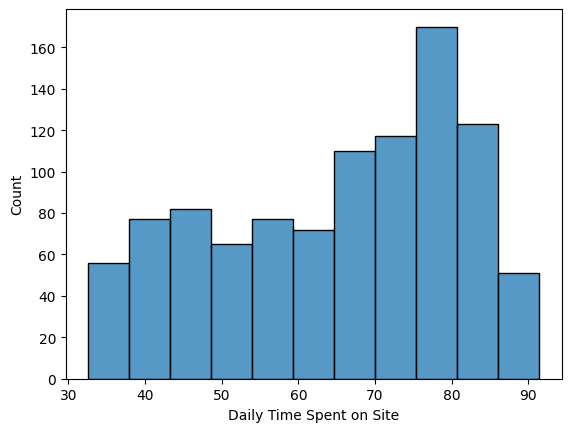

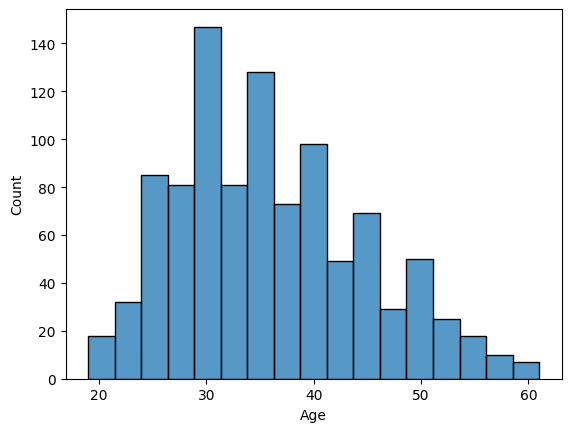

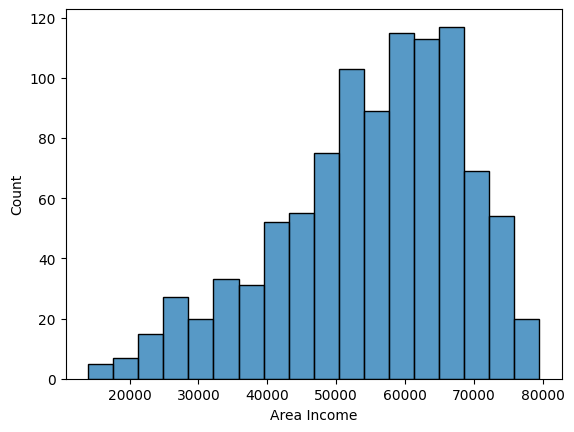

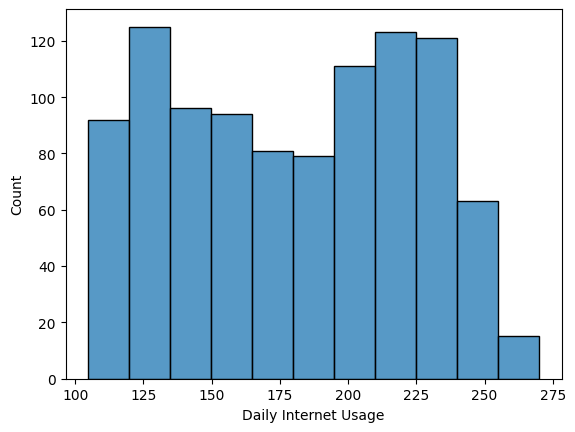

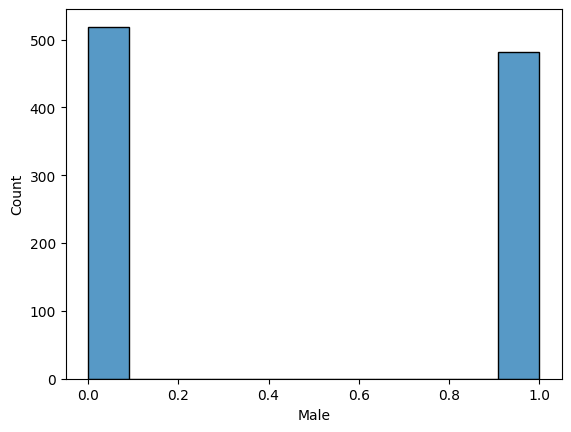

In [13]:
cols = df_model.columns[:-1]
for col in cols:
    sns.histplot(data=df, x=col)
    plt.show()

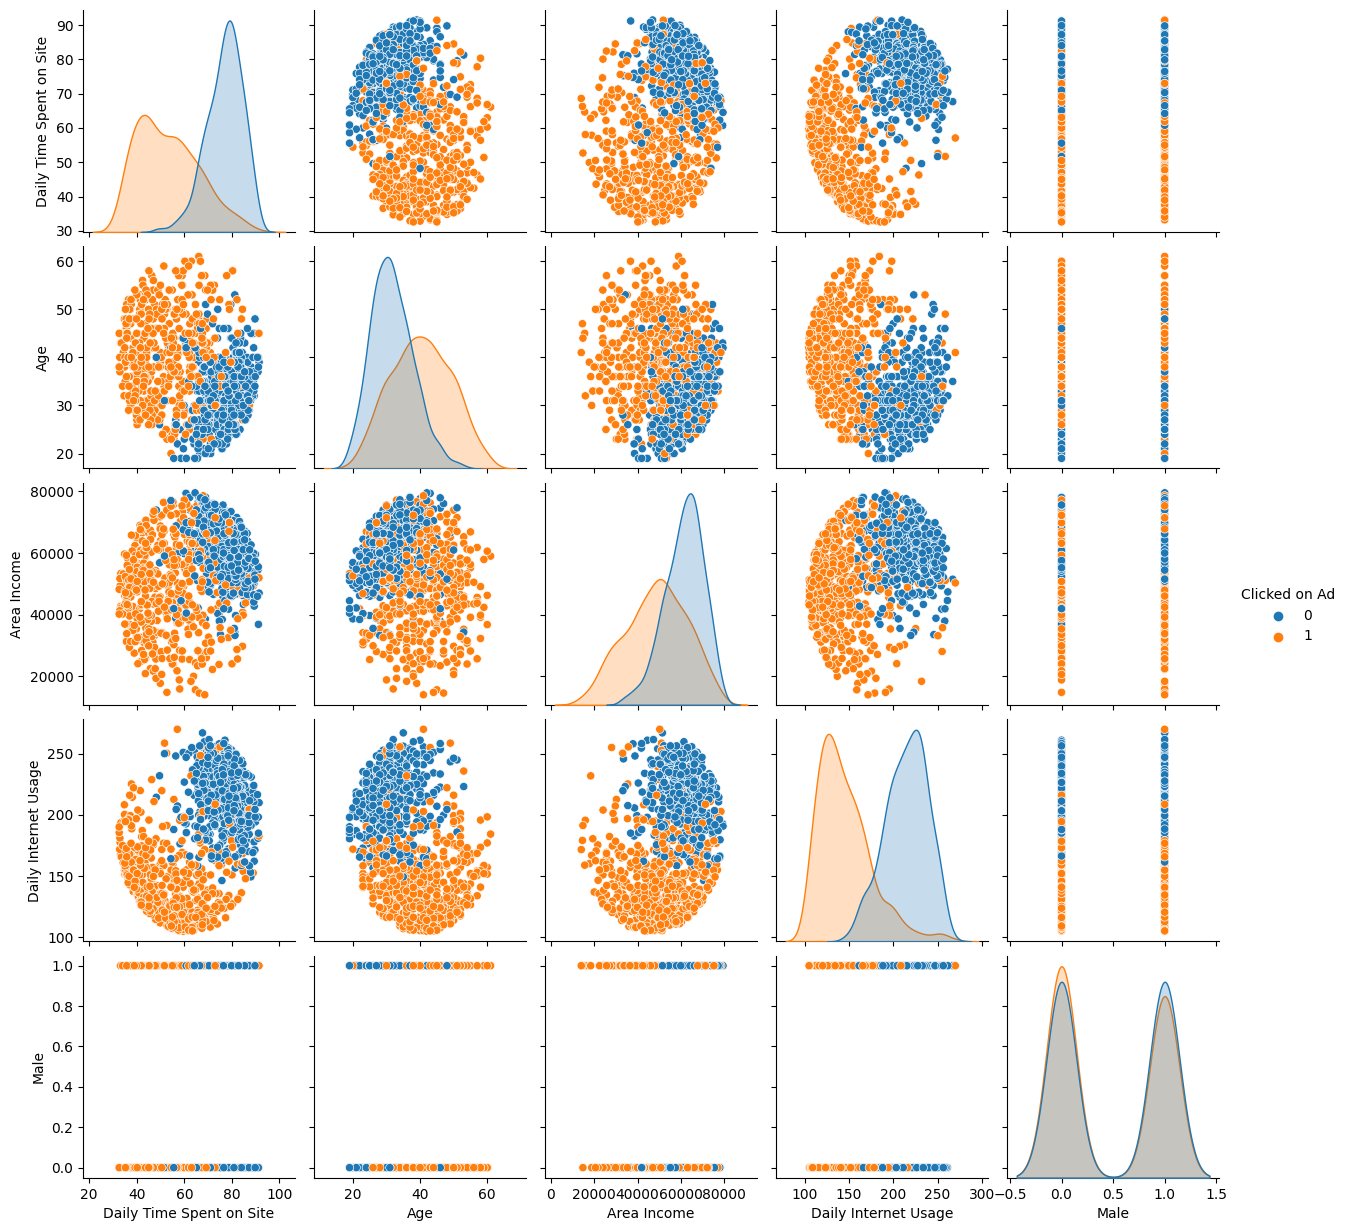

In [14]:
sns.pairplot(df, hue="Clicked on Ad");

In [15]:
X = df_model.drop(columns="Clicked on Ad")
y = df_model["Clicked on Ad"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [20]:
logit.intercept_

array([0.005])

In [21]:
logit.coef_

array([[-0.056,  0.266, -0.   , -0.027,  0.002]])

Remember that, unlike linear regression, due to the fact that the logistic function is an exponential, the variation of $P(x)$ depends on x, and not only on the coefficients. So, the interpretation of the coefficients is not so immediate.

- positive ($b_i > 0$), we have that an increase in x will lead to an increase in $P(x)$;
- negative ($b_i < 0$), we have that an increase in x will lead to a decrease in $P(x)$;

The variation of $P(x)$ itself depends on the value of x.

## Performance metrics for classification problems

After training the model, how can we evaluate its performance?

In the case of classification problems, there are **specific metrics**, and also an important concept called **Confusion Matrix**. The **confusion matrix** takes into account the **predicted classes** and the **true classes** of the **test set**, and counts the model's performance:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note that the main diagonal are the observations that the model got right. We have:

- True Positives (TP): correct classification of the positive class;
- True Negatives (TN): correct classification of the negative class;
- False Positives (FP, type I error): correct: negative. Predicted: positive.
- False Negatives (FN, type II error): correct: positive. Predicted: negative.

<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">

Beyond that, we have the following numerical evaluation metrics:

- Accuracy: percentage of correct classifications of the model;
- Precision: ratio between true positives and the number of predicted positives;
- Recall/Sensitivity: ratio between true positives and the number of truly positives;
- F1-Score: harmonic mean of precision and recall.

Due to the [tradeoff between precision and recall](https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942), a metric that in many cases is interesting to be optimized is F1.

In [22]:
y_pred = logit.predict(X_test)

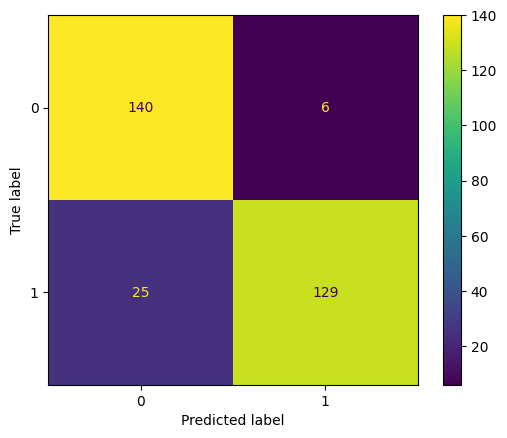

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logit, X_test, y_test);

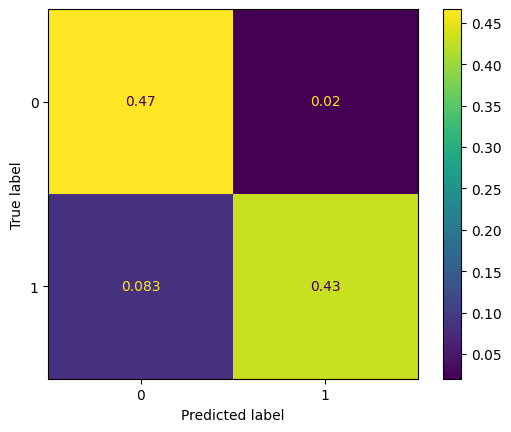

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="all", cmap="viridis");

In [33]:
from sklearn.metrics import classification_report
cr_dict = classification_report(y_test, y_pred, output_dict=True)

In [35]:
cr_dict["1"]

{'precision': 0.9555555555555556,
 'recall': 0.8376623376623377,
 'f1-score': 0.8927335640138409,
 'support': 154}

In [37]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, pos_label=1)

0.9555555555555556

Besides the model coefficients, the sklearn class provides the `predict_proba()` method, which returns the **probability modeled by the logit**, that is, $P(y=1 | \vec{x})$.

This can be very useful, as we can **change the cutoff** to be something other than 0.5.


In [40]:
probas = logit.predict_proba(X_test)

In [45]:
y_proba_0 = probas[:, 0]
y_proba_0[:5]

array([0.506, 0.003, 0.05 , 0.01 , 0.97 ])

In [46]:
y_proba_1 = probas[:, 1]
y_proba_1[:5]

array([0.494, 0.997, 0.95 , 0.99 , 0.03 ])

In [50]:
cutoff = 0.5
y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

0    165
1    135
dtype: int64

In [51]:
cutoff = 0.8
y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

0    186
1    114
dtype: int64

In [52]:
cutoff = 0.9
y_pred_proba = np.where(y_proba_1 >= cutoff, 1, 0)
pd.Series(y_pred_proba).value_counts()

0    202
1     98
dtype: int64

Let's evaluate different cutoffs.

Coeficients:  [[-0.056  0.266 -0.    -0.027  0.002]]
Intercept: [0.005]
Classes: [0 1]

###################################################

Model evaluation with different cutoff values

-> Cutoff: 0.05


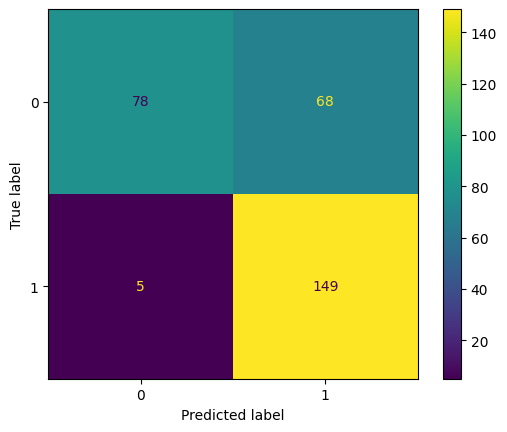


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.94      0.53      0.68       146
           1       0.69      0.97      0.80       154

    accuracy                           0.76       300
   macro avg       0.81      0.75      0.74       300
weighted avg       0.81      0.76      0.74       300


##########################################################

-> Cutoff: 0.1


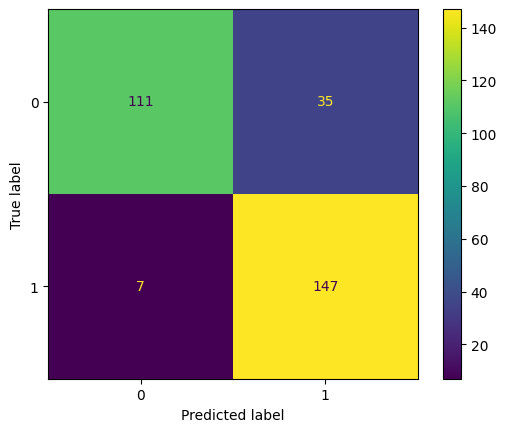


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84       146
           1       0.81      0.95      0.88       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300


##########################################################

-> Cutoff: 0.2


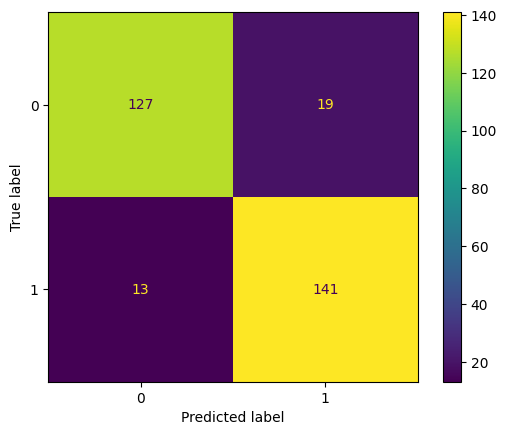


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       146
           1       0.88      0.92      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################

-> Cutoff: 0.3


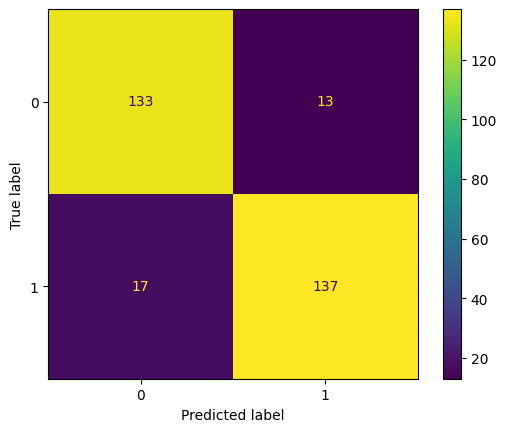


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       146
           1       0.91      0.89      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################

-> Cutoff: 0.4


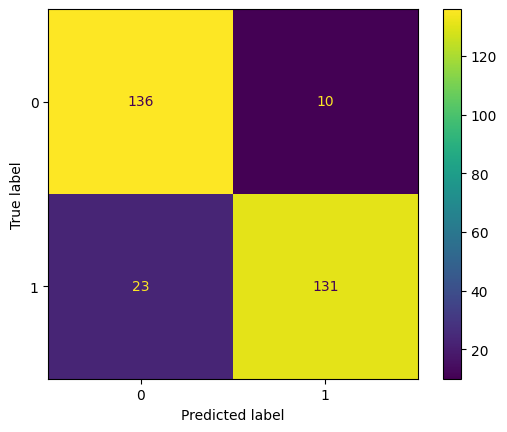


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.85      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################

-> Cutoff: 0.5


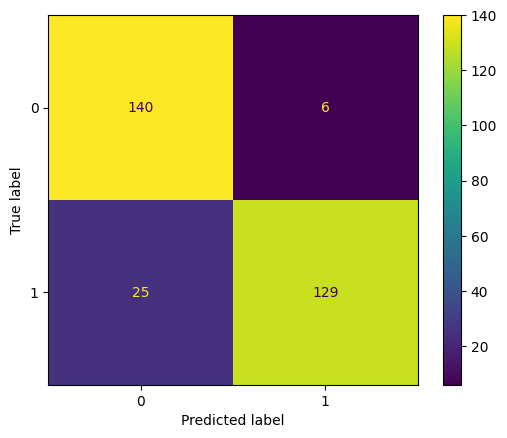


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300


##########################################################

-> Cutoff: 0.6


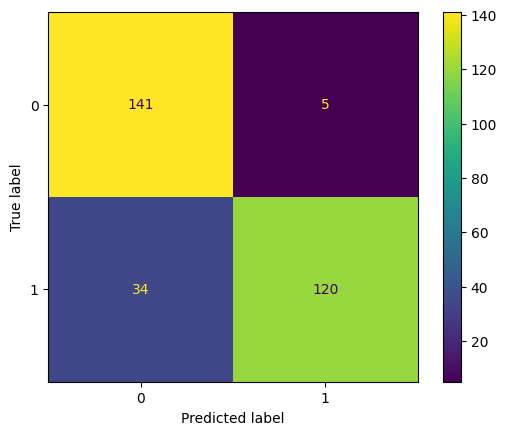


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       146
           1       0.96      0.78      0.86       154

    accuracy                           0.87       300
   macro avg       0.88      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


##########################################################

-> Cutoff: 0.7


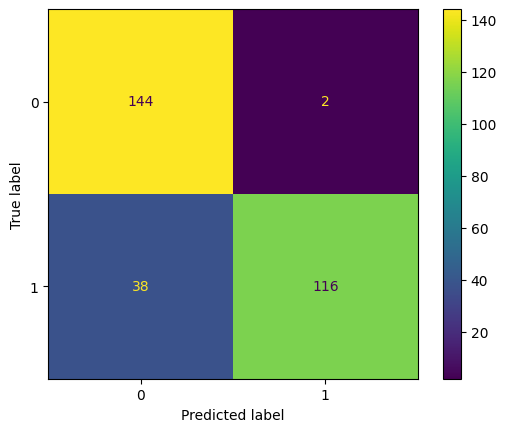


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       146
           1       0.98      0.75      0.85       154

    accuracy                           0.87       300
   macro avg       0.89      0.87      0.87       300
weighted avg       0.89      0.87      0.87       300


##########################################################

-> Cutoff: 0.8


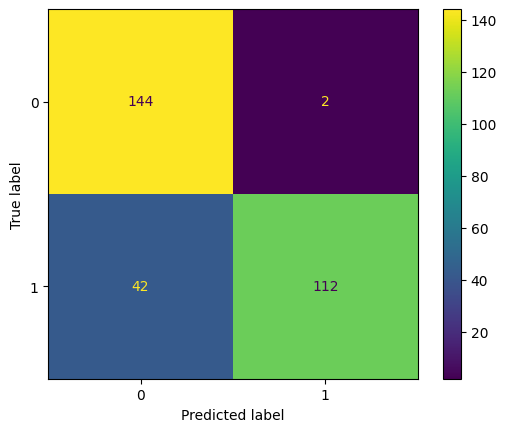


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       146
           1       0.98      0.73      0.84       154

    accuracy                           0.85       300
   macro avg       0.88      0.86      0.85       300
weighted avg       0.88      0.85      0.85       300


##########################################################

-> Cutoff: 0.9


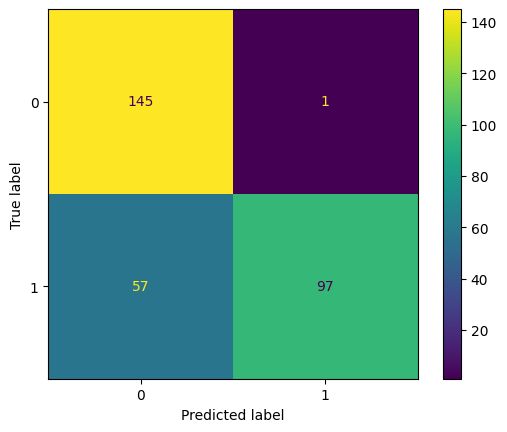


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       146
           1       0.99      0.63      0.77       154

    accuracy                           0.81       300
   macro avg       0.85      0.81      0.80       300
weighted avg       0.86      0.81      0.80       300


##########################################################

-> Cutoff: 0.95


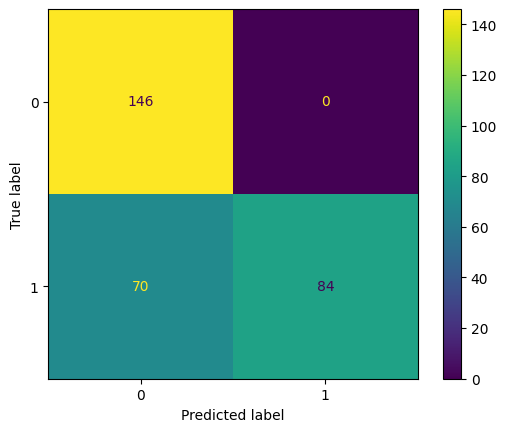


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       146
           1       1.00      0.55      0.71       154

    accuracy                           0.77       300
   macro avg       0.84      0.77      0.76       300
weighted avg       0.84      0.77      0.75       300


##########################################################



In [62]:
df = pd.read_csv("data/advertising.csv")
df = df.select_dtypes(include=[np.number])

X = df.drop(columns = 'Clicked on Ad')
y = df['Clicked on Ad']

estimator = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
model = estimator.fit(X_train, y_train)

print("Coeficients: ", model.coef_)
print("Intercept:", model.intercept_)

classes =  model.classes_
print("Classes:", classes)

probs = model.predict_proba(X_test)

probs_1 = probs[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
threshold_list = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

print("\n###################################################\n")
print("Model evaluation with different cutoff values\n")

for threshold in threshold_list:
    
    print("-> Cutoff:", threshold)
    
    y_pred = np.where(probs_1 >= threshold, 1, 0)
    
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis")
    plt.show()

    print("\nClassification report of the model in the test data:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

## Tradeoff precision/recall

As we can see above, there is clearly a **tradeoff** between precision and recall as we vary the cutoff. We can easily visualize this tradeoff with sklearn.

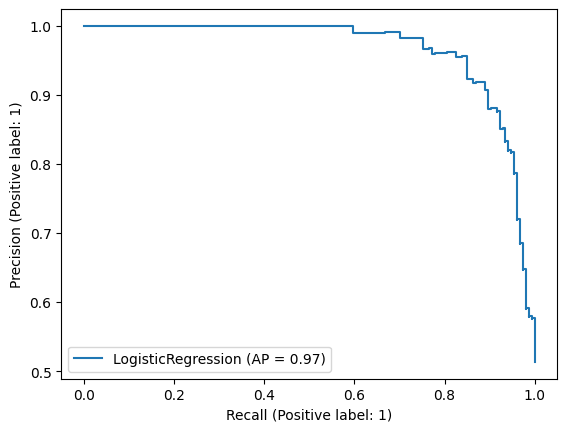

In [70]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(logit, X_test, y_test);

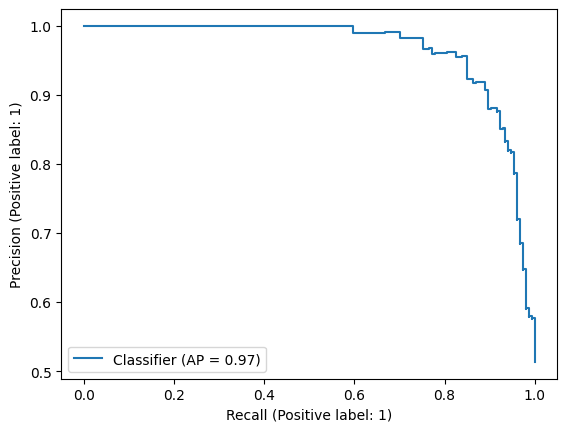

In [71]:
y_proba_1 = logit.predict_proba(X_test)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, y_proba_1);

Or else:

In [77]:
from sklearn.metrics import precision_recall_curve

y_proba_1 = logit.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_1)
precisions.shape, recalls.shape, thresholds.shape

((301,), (301,), (300,))

cross point: [0.249]


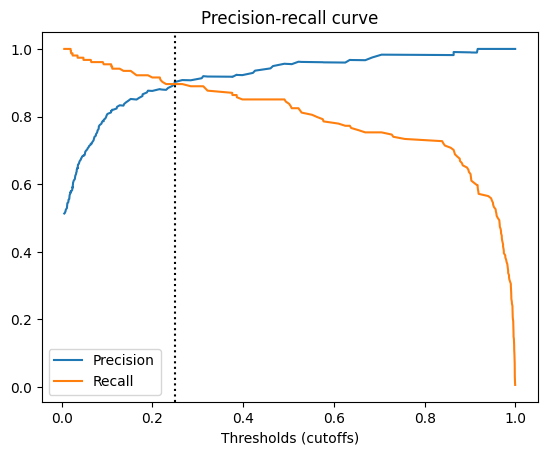

In [79]:
plt.title("Precision-recall curve")

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")

plt.xlabel("Thresholds (cutoffs)")

cross_point = thresholds[np.where(precisions == recalls)]
print("cross point:", cross_point)
plt.axvline(x=cross_point, ls=":", color="black")

plt.legend()
plt.show()


 Cutoff: [0.249]

Confusion matrix of the model in the test data:


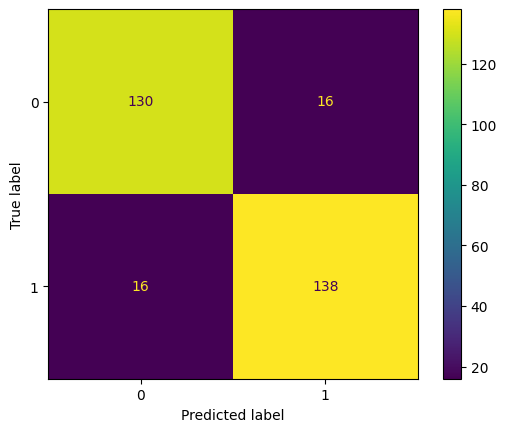


Classification report of the model in the test data:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       146
           1       0.90      0.90      0.90       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300


##########################################################



In [81]:
print("\n Cutoff:", cross_point)

y_pred = np.where(probs_1 >= cross_point, 1, 0)

print("\nConfusion matrix of the model in the test data:")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="viridis")
plt.show()

print("\nClassification report of the model in the test data:")
print(classification_report(y_test, y_pred))

print("\n##########################################################\n")

# ROC Curve and AUC-ROC

Let's now see another metric for evaluating classification models that is closely related to the different possible thresholds -- the **AUC (Area Under The Curve) of the ROC (Receiver Operating Characteristics) curve**, sometimes called **AUROC (Area Under the Receiver Operating Characteristics)**.

The **ROC curve is a probability curve**, and **AUC is the area under the curve**, representing **the degree of separability achieved by the model**. That is, this measure tells us **how much the model is able to distinguish between two classes**.

The ROC curve is built with the **false positive rate** on the x-axis, and the **true positive rate** on the y-axis, for different **classification thresholds**:

<img src="https://miro.medium.com/max/1175/1*2nd7NTEBosPakccmLVWy9A.png" width=500>

The value of AUC-ROC will always be **between 0 and 1**, and **the closer to 1, the better the model**.

Values of AUC-ROC greater than 0.5 (closer to 1) mean that the model has a **true positive rate greater than the false positive rate**, that is, the model is getting more right. The closer to 0 (for values below 0.5), we will have a model that does a good job of separating the classes, but classifies them incorrectly. And the **closer to 0.5**, the worse the model is at separating the classes: it would be a model that simply randomly guesses either class 0 or class 1. See the images below for an illustration:

<img src="https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg" width=400>

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba_1)

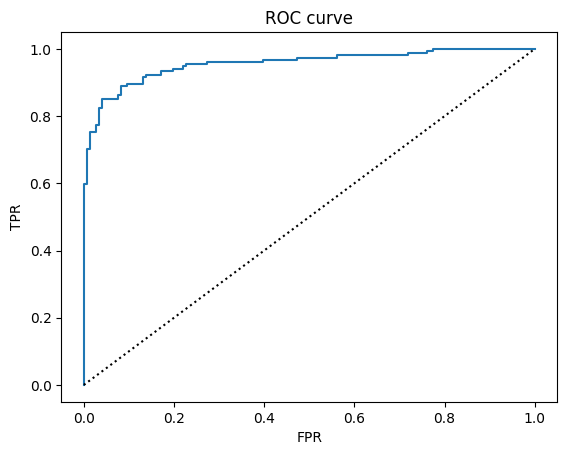

In [85]:
plt.title("ROC curve")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.show();

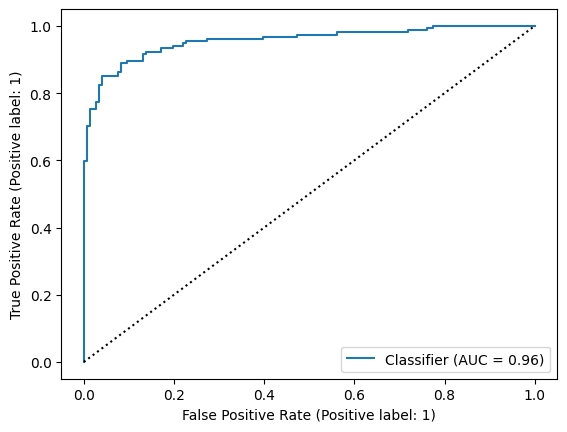

In [86]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_1)
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, ls=":", color="black")
plt.show();

In [87]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_1)

0.9559242127735279

## Multiclass classification

There are problems in which we have a **multiclass classification problem**, as there are more than two classes to be predicted.

<img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png">

The method for building and evaluating the model with sklearn is exactly the same. Nevertheless, conceptually, there are some changes: strictly speaking, the model is now called **multinomial logistic regression**, whose classification process is given by the **softmax** function:

<img src="https://i.stack.imgur.com/YLeRi.png" width=600>

The logit score is, essentially, the value of the linear term used as an argument of the sigmoid, that is, $z(x) = b_0 + b_1 x_1 + \cdots + b_p x_p$.